In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

df=pd.read_csv("../data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0


In [5]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# fill missing values with mean
df.fillna(df.mean(), inplace=True)

New_missing_values = df.isnull().sum()
print("New Missing Values:\n",New_missing_values)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
New Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# scaled data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [6]:
# categorical to numeric by one-hot 
df = pd.get_dummies(df, drop_first=True)

# display updated dataframe
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [ ]:
# correlation matrix
corr_matrix = df.corr()

# save cleaned dataset
df.to_csv("../data/cleaned_data.csv", index=False)
print("Cleaned dataset saved successfully!")



Cleaned dataset saved successfully!


In [11]:
# load the cleaned dataset
df = pd.read_csv("../data/cleaned_data.csv")

# display statistical summary
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.695610,0.314146,0.354827,0.273973,0.149268,0.264648,0.596291,0.336585,0.172910,0.692683,0.188537,0.774634,0.513171
std,0.189006,0.460373,0.343214,0.165252,0.117791,0.356527,0.263836,0.175616,0.472772,0.189493,0.308878,0.257699,0.206887,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.465649,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.562500,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.618321,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.340183,0.000000,0.500000,0.725191,1.000000,0.290323,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


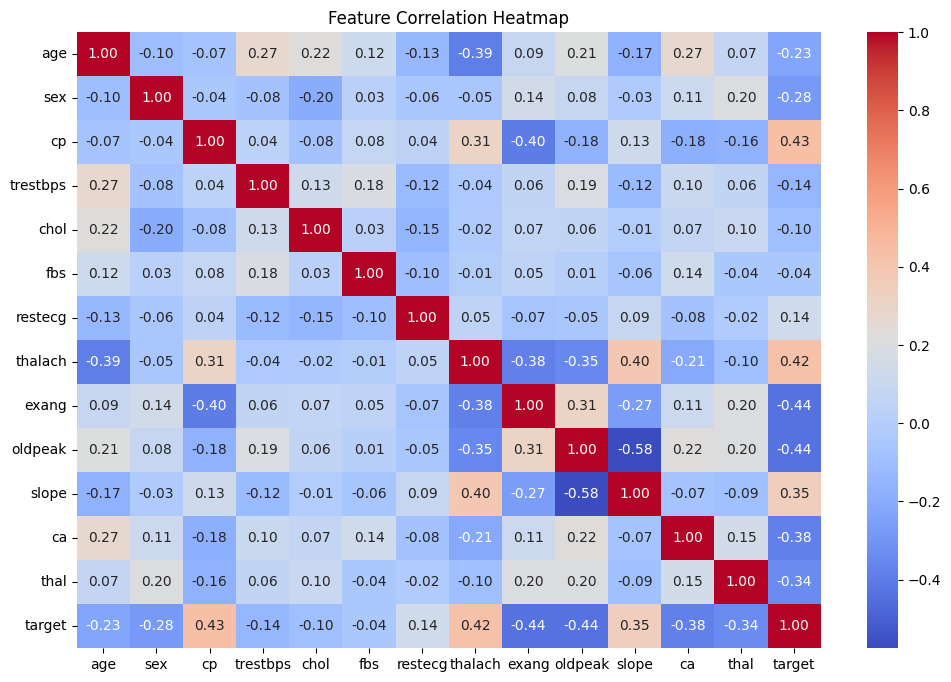

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


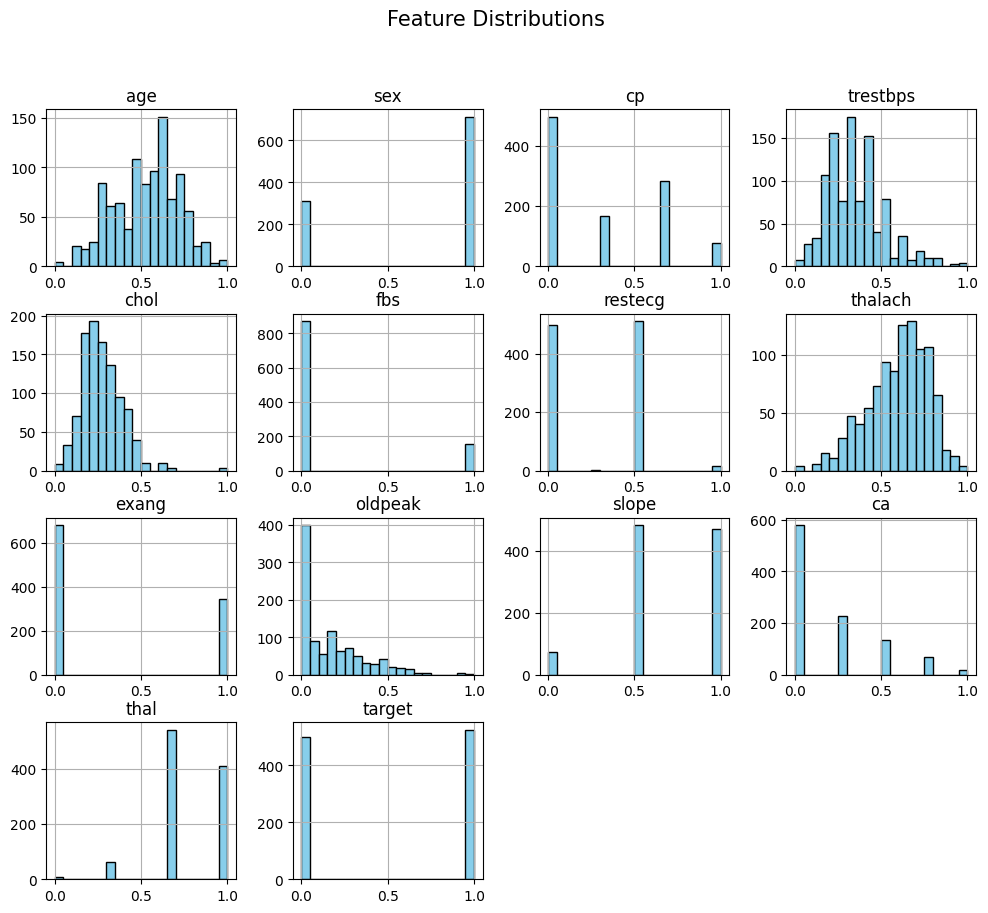

In [15]:
#histogram
df.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

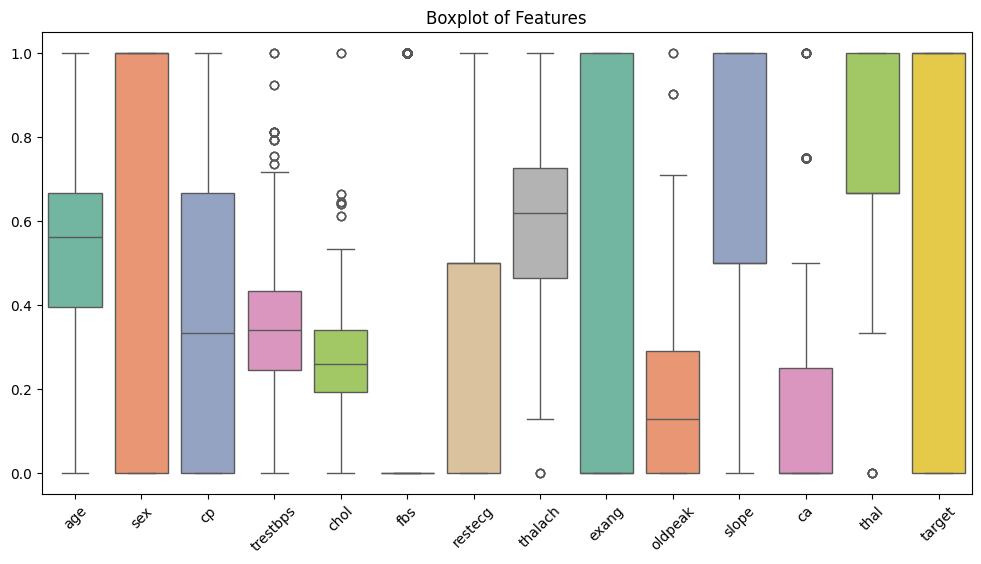

In [16]:
#boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()


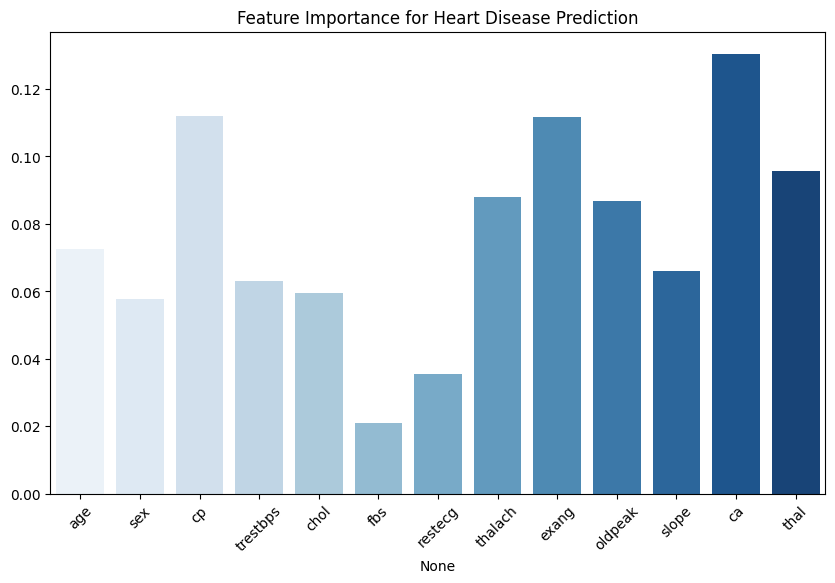

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

# define X (features) and y (target)
X = df.drop(columns=['target'])  #'target'column for heart disease
y = df['target']

# train a feature importance model
model = ExtraTreesClassifier()
model.fit(X, y)

# plot feature importances 
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=model.feature_importances_, hue=X.columns, palette="Blues", legend=False)
plt.xticks(rotation=45)
plt.title("Feature Importance for Heart Disease Prediction")
plt.show()
